In [2]:
import cv2

import matplotlib.pyplot as plt

%matplotlib inline

## Use only the location of the Door

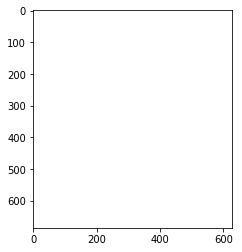

In [14]:
Door = cv2.imread('temp\\Door75.jpg',1)
Door = cv2.blur(Door,(7,7))
#_, Gray = cv2.threshold(Door, 18, 255, cv2.THRESH_BINARY_INV)
Door_HSV = cv2.cvtColor(Door, cv2.COLOR_BGR2HSV)
Door_threshold = cv2.inRange(Door_HSV, (0, 0, 0), (255, 255, 255))
plt.imshow(cv2.cvtColor(Door_threshold, cv2.COLOR_BGR2RGB))

In [ ]:
from __future__ import print_function
import cv2 as cv
import argparse
import numpy as np

max_value = 255
max_value_H = 360//2
low_H = 0
low_S = 0
low_V = 0
high_H = max_value_H
high_S = max_value
high_V = max_value
window_capture_name = 'Video Capture'
window_detection_name1 = 'Object Detection1'
window_detection_name2 = 'Object Detection2'
window_detection_name3 = 'Object Detection3'

low_H_name = 'Low H'
low_S_name = 'Low S'
low_V_name = 'Low V'
high_H_name = 'High H'
high_S_name = 'High S'
high_V_name = 'High V'
def on_low_H_thresh_trackbar(val):
    global low_H
    global high_H
    low_H = val
    low_H = min(high_H-1, low_H)
    cv.setTrackbarPos(low_H_name, window_detection_name1, low_H)
    
def on_high_H_thresh_trackbar(val):
    global low_H
    global high_H
    high_H = val
    high_H = max(high_H, low_H+1)
    cv.setTrackbarPos(high_H_name, window_detection_name1, high_H)
def on_low_S_thresh_trackbar(val):
    global low_S
    global high_S
    low_S = val
    low_S = min(high_S-1, low_S)
    cv.setTrackbarPos(low_S_name, window_detection_name1, low_S)
def on_high_S_thresh_trackbar(val):
    global low_S
    global high_S
    high_S = val
    high_S = max(high_S, low_S+1)
    cv.setTrackbarPos(high_S_name, window_detection_name1, high_S)
def on_low_V_thresh_trackbar(val):
    global low_V
    global high_V
    low_V = val
    low_V = min(high_V-1, low_V)
    cv.setTrackbarPos(low_V_name, window_detection_name1, low_V)
def on_high_V_thresh_trackbar(val):
    global low_V
    global high_V
    high_V = val
    high_V = max(high_V, low_V+1)
    cv.setTrackbarPos(high_V_name, window_detection_name1, high_V)
    
    
cv.namedWindow(window_capture_name)
cv.namedWindow(window_detection_name1)
cv.namedWindow(window_detection_name2)
cv.namedWindow(window_detection_name3)
cv.createTrackbar(low_H_name, window_detection_name1 , low_H, max_value_H, on_low_H_thresh_trackbar)
cv.createTrackbar(high_H_name, window_detection_name1 , high_H, max_value_H, on_high_H_thresh_trackbar)
cv.createTrackbar(low_S_name, window_detection_name1 , low_S, max_value, on_low_S_thresh_trackbar)
cv.createTrackbar(high_S_name, window_detection_name1 , high_S, max_value, on_high_S_thresh_trackbar)
cv.createTrackbar(low_V_name, window_detection_name1 , low_V, max_value, on_low_V_thresh_trackbar)
cv.createTrackbar(high_V_name, window_detection_name1 , high_V, max_value, on_high_V_thresh_trackbar)


def process_the_image(image):
    image = cv.blur(image,(3,3))
    image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    #image = cv.inRange(image, (15, 7, 0), (135, 204, 24))
    #image = cv.inRange(image, (32, 7, 0), (123, 153, 45))
    
    #image = cv.inRange(image, (0, 36, 0), (122, 72, 26))
    #image = cv.inRange(image, (106, 0, 0), (180, 255, 255))
    #image = cv.inRange(image, (26, 0, 0), (74, 255, 255))
    cv.inRange(image, (32, 7, 0), (123, 153, 30))
    image = cv.inRange(image, (low_H, low_S, low_V), (high_H, high_S, high_V))
    #image = cv.Canny(image, low_S, high_S)
    kernel = np.ones((11,11),np.uint8) 
    image = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)    
    
    
    
    return image
    

while(1):
    #filelist = ['temp\\F_Door.jpg', 'temp2\\F_Door.jpg', 'temp3\\F_Door.jpg']
    #filelist = ['complete\\R_1.jpg', 'complete\\R_2.jpg', 'complete\\R_3.jpg']
    filelist = ['complete\\W2_1.jpg', 'complete\\W2_2.jpg', 'complete\\W2_3.jpg']
    #filelist = ['complete\\G_1.jpg', 'complete\\G_2.jpg', 'complete\\G_3.jpg']
    frame = cv.imread(filelist[0],1)
    frame_threshold = process_the_image(frame)
    
    frame2 = cv.imread(filelist[1],1)
    frame_threshold2 = process_the_image(frame2)
    
    frame3 = cv.imread(filelist[2],1)
    frame_threshold3 = process_the_image(frame3)


    cv.imshow(window_capture_name, frame)
    
    cv.imshow(window_detection_name1, frame_threshold)
    cv.imshow(window_detection_name2, frame_threshold2)
    cv.imshow(window_detection_name3, frame_threshold3)
    

    key = cv.waitKey(30)
    if key == ord('q') or key == 27:
        break    

        
#H: 15 135
#S: 7 204
#V: 0 24

In [533]:
import cv2 as cv
import argparse
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def process_the_image(original_image):
    draw_image = original_image.copy()
    contour_img_car_window = preprocessing_the_car_window(original_image.copy())
    draw_image, door_guided_image = draw_contour_of_the_car_window(draw_image, contour_img_car_window)
    draw_image, door_guided_image = preprocessing_the_car_door(draw_image, door_guided_image)

    return draw_image



def preprocessing_the_car_door(draw_image, door_guided_image):
    contours, hierarchy = cv.findContours(door_guided_image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    area_threshold = 10000
    center_of_image = np.array((door_guided_image.shape[1]//2 ,door_guided_image.shape[0]//2))
    centerpoint_of_contour = []
    index_of_contour = []
    for i in range(len(contours)):  
        area = cv.contourArea(contours[i])
        if area>area_threshold:
            M = cv.moments(contours[i])
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])        
            centerpoint_of_contour.append((cX, cY))
            index_of_contour.append(i)
    dist = np.linalg.norm(center_of_image - centerpoint_of_contour, axis=1)
    door_index = np.argmin(dist)
    cv.drawContours(draw_image, contours, index_of_contour[door_index], (255,255,0), -1)
    #cv.circle(draw_image, center_of_image, 20, (255, 255, 255), -1)
    
    return draw_image, door_guided_image

def preprocessing_the_car_window(image):
    image = cv.blur(image,(5,5))
    image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    h = np.mean(image[:,:,0])
    s = np.mean(image[:,:,1])
    v = np.mean(image[:,:,2])
    print("mean hsv", h, " ", s, " ",v)
    #image = cv.inRange(image, (15, 7, 0), (135, 204, 24))
    
    #=====深色車 淺色車分開處理
    if(v<100):#深色車
        image = cv.inRange(image, (20, 7, 0), (123, 153, 30))
    else:
        image = cv.inRange(image, (20, 7, 0), (123, 153, 50))
        
    #pathimage = cv.inRange(image, (26, 0, 0), (74, 255, 255))
    #image = window_door_image-pathimage
#     kernel = np.ones((23,23),np.uint8) 
#     image = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)    

#     kernel = np.ones((5,5),np.uint8) 
#     image = cv.morphologyEx(image, cv.MORPH_OPEN, kernel)
    
    return image



#找到車窗線
def draw_contour_of_the_car_window(original_img, contour_img):
    door_guided_image = np.ones_like(contour_img, dtype=np.uint8)
    
    contours, hierarchy = cv.findContours(contour_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    #cv.drawContours(original_img, contours, -1, (0,255,0), 3)
    area_threshold = 3000
    window_threshold = 10000
    window_extRight_list = []
    window_extLeft_list = []
    door_bottom = [None,2**32]#contour,Cx,Cy
    Left_Bottom_of_image = np.array([0, original_img.shape[0]])
    for i in range(len(contours)):
        area = cv.contourArea(contours[i])
        
        if area>area_threshold:
            # find the bottom point by x coordinate
#             contour_sorted = np.array(sorted(contours[i].reshape(contours[i].shape[0], contours[i].shape[2]) , key=lambda k: [k[0], k[1]]))
#             value, ind = np.unique(contour_sorted[:,0], return_index=True)
#             ind[0] = contour_sorted.shape[0]
#             res = contour_sorted[np.roll(ind, -1) -1]
            
#             bottom_contour = res.reshape(res.shape[0], 1, 2)
#             cv.drawContours(original_img, bottom_contour, -1, (255,255,0), 3)
            
            # 找到contour的中心點
            M = cv.moments(contours[i])
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])        
            #print("center point", (cX, cY))
            
            #=====用中心點位置分辨車窗和車門
            if(cY<100):
                continue
                
            elif(cY>original_img.shape[0]/2):#地板
                
                #和左下角的距離最小的那個就是
                boundRect = cv.boundingRect(contours[i])
                
                Left_Bottom = np.array([boundRect[0], boundRect[1]+boundRect[3]])#X,Y
                #print(Left_Bottom)
                dist = np.linalg.norm(Left_Bottom-Left_Bottom_of_image)
                #print(dist)
                if(dist < door_bottom[1]):#找y最大的(最下面的)
                    door_bottom = [contours[i], dist]
                    #print(extBot[1], " " ,extBot[0])
                #cv.circle(original_img, (Left_Bottom[0], Left_Bottom[1]), 20, (0, 255, 255), -1)
                #cv.drawContours(original_img, contours, i, (255,0,0), -1)
                #cv.drawContours(door_guided_image, contours, i, (0,0,0), -1)
                

            elif area>window_threshold:#車窗
                #cv.drawContours(original_img, contours, i, (0,0,255), -1)
                hull_list = []
                hull_list.append(cv.convexHull(contours[i]))
                cv.drawContours(original_img, hull_list, 0, (0,0,255), -1)
                
                cv.drawContours(door_guided_image, hull_list, 0, (0, 0, 0), -1)
                #=====找車窗最右邊的點
                #x,y,w,h = cv.boundingRect(contours[i])
                #cv.rectangle(original_img, (x, y), (x + w, y + h), (0, 255,0), 2)
                extLeft = tuple(hull_list[-1][hull_list[-1][:, :, 0].argmin()][0])
                extRight = tuple(hull_list[-1][hull_list[-1][:, :, 0].argmax()][0])
                #車窗可能不只框到一個
                window_extLeft_list.append(extLeft)
                window_extRight_list.append(extRight)

    #畫車門
    #cv.drawContours(original_img, door_bottom, 0, (255,0,0), -1)
    cv.drawContours(door_guided_image, door_bottom, 0, (0,0,0), -1)                
    
    #畫車窗最右邊的點
    extRight = max(window_extRight_list,key=lambda item:item[0])
    extLeft = min(window_extLeft_list,key=lambda item:item[0])
#     cv.circle(original_img, extRight, 20, (0, 255, 255), -1)
#     cv.circle(original_img, extLeft, 20, (0, 255, 255), -1)
        
    #cv.rectangle(original_img,(extRight[0], 0),(original_img.shape[1], original_img.shape[0]) , (0, 255,0), -1)    
    #cv.rectangle(original_img, (0, 0), (extLeft[0], original_img.shape[0]), (0, 255, 0), -1)
    cv.rectangle(door_guided_image, (extRight[0], 0),(original_img.shape[1], original_img.shape[0]), (0, 0, 0), -1)
    cv.rectangle(door_guided_image, (0, 0), (extLeft[0], original_img.shape[0]), (0, 0, 0), -1)
    

    
    return original_img, door_guided_image

#filelist = ['temp\\F_Door.jpg', 'temp2\\F_Door.jpg', 'temp3\\F_Door.jpg']
#filelist = ['complete\\G_1.jpg', 'complete\\G_2.jpg', 'complete\\G_3.jpg']
#filelist = ['complete\\R_1.jpg', 'complete\\R_2.jpg', 'complete\\R_3.jpg']
filelist = ['complete\\W2_1.jpg', 'complete\\W2_2.jpg', 'complete\\W2_3.jpg']
#filelist = ['complete\\W1_1.jpg', 'complete\\W1_2.jpg', 'complete\\W1_3.jpg']
print(filelist[0])
frame = cv.imread(filelist[0], 1)
frame_threshold = process_the_image(frame)

print(filelist[1])
frame2 = cv.imread(filelist[1], 1)
frame_threshold2 = process_the_image(frame2)

print(filelist[2])
frame3 = cv.imread(filelist[2], 1)
frame_threshold3 = process_the_image(frame3)




complete\W2_1.jpg
mean hsv 92.51082683793948   62.46532186315898   134.45796691513985
complete\W2_2.jpg
mean hsv 90.91557181404278   62.073358418299165   145.00672134538465
complete\W2_3.jpg
mean hsv 95.35126223091976   66.77505381604696   139.05982387475538


True

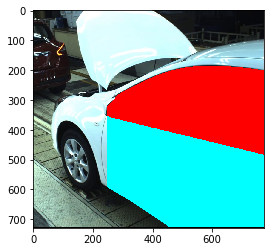

In [534]:
plt.imshow(cv.cvtColor(frame_threshold, cv.COLOR_BGR2RGB))
#plt.imshow(frame_threshold, cmap = 'gray')
cv.imwrite('1_B.jpg', frame_threshold)

True

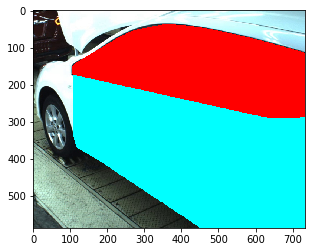

In [535]:
plt.imshow(cv.cvtColor(frame_threshold2, cv.COLOR_BGR2RGB))
#plt.imshow(frame_threshold2, cmap = 'gray')
cv.imwrite('2_B.jpg', frame_threshold2)

True

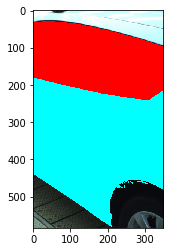

In [536]:
plt.imshow(cv.cvtColor(frame_threshold3, cv.COLOR_BGR2RGB))
#plt.imshow(frame_threshold3, cmap = 'gray')
cv.imwrite('3_B.jpg', frame_threshold3)

### Reference

[find extreme point from contour](https://www.pyimagesearch.com/2016/04/11/finding-extreme-points-in-contours-with-opencv/)

### PlayGround

1. 找到哪些框框是同一個car
2. 如何從同個car把框框合起來

In [209]:

pts2 = [[1041, 426, 1232, 921, 3, 0.42365667], [453, 367, 816, 823, 3, 0.63019407]]

pts3 = [[1041, 426, 1232, 921, 3, 0.42365667], [453, 367, 816, 823, 3, 0.63019407], [698, 352, 1142, 1006, 3, 0.9703277]]

In [215]:
#找第一個元素最小者
print(min(pts3, key=lambda x: x[0]))
print(min(pts3, key=lambda x: x[1]))
print(max(pts3, key=lambda x: x[2]))
print(max(pts3, key=lambda x: x[3]))

[453, 367, 816, 823, 3, 0.63019407]
[698, 352, 1142, 1006, 3, 0.9703277]
[1041, 426, 1232, 921, 3, 0.42365667]
[698, 352, 1142, 1006, 3, 0.9703277]
